# Machine Learning Introduction

## Introduction and Data Set
Credits: Most of the material of this lecture is adopted from www.kaggle.com

This lecture provides an overview of how machine learning models can be used for real problems. We will build models as well as a machine learning pipeline based on the following scenario:

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Instead of using intuition to make good decision, we want to train a machine learning model to predict the value of new houses.

## Loading the Data
The first step in any machine learning project is to load and familiarize yourself with the data. To this end, we can use the pandas library from last week and load the dataset with the following commands:

In [1]:
import pandas as pd

In [109]:
melbourne_file_path = "https://github.com/NikoStein/pds_data/raw/main/data/melb_data.csv"
melbourne_data = pd.read_csv(melbourne_file_path)

melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [110]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [111]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [112]:
melbourne_data["Type"].value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

For simplicity we remove rows with missing values for this example. Note that a missing value can sometimes be a valuable information.

In [113]:
print(melbourne_data.shape)
melbourne_data.dropna(axis=0, inplace=True)
print(melbourne_data.shape)

(13580, 21)
(6196, 21)


## Select data for modeling
On a first glimpse, we see that our dataset has too many variables to wrap our heads around. How can we pare down this overwhelming amount of data to something we can understand?

We'll start by picking a few variables using our intuition. To choose variables, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame:

In [114]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Selecting the prediction target

To train a predictive model using supervised machine learning techniques, we have to identify the target variable. In the problem at hand, we want to predict the house prices. This information is encoded in the column Price.

By convention, the target variable is called **y**.

In [115]:
y = melbourne_data['Price']

In [116]:
y.describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

### Choosing "Features"
The columns that serve as input for our model (and are later used to make predictions) are called "features." Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).


In [117]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']

In [118]:
melbourne_features2 = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude', "Distance","Car"]

By convention, this data is called **X**.

In [119]:
X = melbourne_data[melbourne_features2]

Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows. Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

In [120]:
print(X.shape)
X.head()

(6196, 9)


,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Distance,Car
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934,2.5,0.0
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944,2.5,0.0
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941,2.5,2.0
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993,2.5,0.0
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954,2.5,2.0


In [121]:
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Distance,Car
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988,-37.807904,144.990201,9.751097,1.573596
std,0.971079,0.711362,897.449881,90.834824,38.105673,0.075850,0.099165,5.612065,0.929947
min,1.000000,1.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,0.000000,0.000000
25%,2.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,5.900000,1.000000
50%,3.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,9.000000,1.000000
75%,4.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,12.400000,2.000000
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,47.400000,10.000000


In [122]:
melbourne_data["Type"].value_counts()

Type
h    4088
u    1506
t     602
Name: count, dtype: int64

In [123]:
try:
    from lets_plot import *
    from lets_plot import tilesets
except ImportError:
    %pip install lets_plot
    from lets_plot import *
    from lets_plot import tilesets
import numpy as np


In [124]:
LetsPlot.setup_html()
ggplot(melbourne_data) + \
geom_livemap(tiles=tilesets.OSM) + \
geom_point(aes(x='Longtitude', y='Lattitude', color='Price'))

In [125]:
# Calculate quantiles for thirds
quantiles = melbourne_data['Price'].quantile([0.33, 0.66])

# Define a function to categorize the data based on quantiles
def categorize(value):
    if value <= quantiles[0.33]:
        return 'Low'
    elif value <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the column
melbourne_data['priceCategory'] = melbourne_data['Price'].apply(categorize)

ggplot(melbourne_data) + \
geom_livemap(tiles=tilesets.OSM) + \
geom_point(aes(x='Longtitude', y='Lattitude', color='priceCategory'))


In [126]:
melbourne_data['logprice'] = melbourne_data['Price'].apply(np.log)

In [127]:
ggplot(melbourne_data) + \
geom_livemap(tiles=tilesets.OSM) + \
geom_point(aes(x='Longtitude', y='Lattitude', color='logprice'))

## Building Models in Scikit-learn
For now, we will use the scikit-learn library to create our models. As you will see in the upcoming section, this library is written as sklearn in the code. Scikit-learn offers a lot of powerful features and is easily the most popular library for modeling tabular data.

The steps to building and using a model in Scikit-learn are:
* Define:  What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* Fit: Capture patterns from our input data.
* Predict: Make predictions using input variables and the trained model.
* Evaluate: Determine how accurate the model's predictions are.

### Our first Decision Tree
Here is a simple example of defining a decision tree model with scikit-learn and fitting it with the features and target variable selected above:

In [128]:
from sklearn.tree import DecisionTreeRegressor

# Define
melbourne_model = DecisionTreeRegressor(random_state=1)
melbourne_model


DecisionTreeRegressor(random_state=1)

In [129]:
# Fit
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [130]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934   
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944   
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941   
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993   
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954   

   Distance  Car  
1       2.5  0.0  
2       2.5  0.0  
4       2.5  2.0  
6       2.5  0.0  
7       2.5  2.0  
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model Validation

We have successfully trained our very first model. However, we have no clue how good our model is. Yet, measuring model quality is the key to iteratively improving our models.

In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

### Metrics

To evaluate the performance of our model we need to find a way to summarize the model quality in an understandable way. If we compare predicted and actual home values in our example dataset for 10,000 houses, we will find a mix of good and bad predictions. However, looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (**MAE**). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

``error=actual−predicted``

So, if a house cost \$150,000 and you predicted it would cost \$100,000 the error is \$50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality.

We could implement a function to calculate this metric (or any other metric) on our dataframe. However, Scikit-learn provides implementations of the most common metrics that can be easily imported.

In [131]:
from sklearn.metrics import mean_absolute_error

So lets use our decision tree model to make predictions for all observations in our dataset and calculate the MAE:

In [132]:
predicted_home_prices = melbourne_model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)

print("The MAE of our model is: {}".format(mae))

The MAE of our model is: 433.1020012911556


## In-Sample vs. Out-of-Sample Scores

The MAE of our model looks very promising. However, we used a single "sample" of houses for both building the model and evaluating it. Hence, the measure we just computed can be called an "in-sample" score.

Trusting the in-sample score to evaluate a model is very dangerous. Imagine that there is a variable in the dataset that is unrelated to the home price (e.g., the name of the current owner). However, in the sample of data we used to build the model, all names are unique and hence, all house prices in the sample can be explained by this feature. Our model will see this pattern and it will try to apply it to new datasets.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate the MAE.

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
# Split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)



In [135]:
X.shape[0]*0.75

4647.0

In [136]:
train_X.shape

(4647, 9)

In [137]:
val_X.shape

(1549, 9)

In [138]:
# Build the model
melbourne_model = DecisionTreeRegressor(random_state=1)
melbourne_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = melbourne_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 249979.34667527437


The MAE for the in-sample data was about \$500. Out-of-sample it is more than \$250,000.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is about \$1.1 million. So the error in new data is about a quarter of the average home value.

There are many ways to improve this model, such as experimenting to find better features or different model types.

## Model Tuning

Now that we have a reliable way to measure the model performance, we can experiment with different parameters of the decision tree (or entirely different models) and see which combination gives us the best predictions. You can find the available models and parameters in the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/classes.html).

In this simple example we will stick with our decision tree model and only vary one of the parameters.

You can see in the decision tree [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) that the model has many parameters (more than you'll want or need for a long time). The most important parameters determine the tree's depth.

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have $2^{10}$  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses). This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups. At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We write a short utility function to help compare MAE scores from different values for max_leaf_nodes:

In [139]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Next, we loop over different values for the parameter to compare the in-sample and the out-of-sample performance of our model:

In [140]:
for max_leaf_nodes in [2, 5, 50, 500, 5000, 10000]:
    is_mae = get_mae(max_leaf_nodes, X, X, y, y)
    oos_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t In-sample:  %d \t Out-of-sample:  %d" %(max_leaf_nodes, is_mae, oos_mae))

Max leaf nodes: 2  	 In-sample:  411930 	 Out-of-sample:  433608
Max leaf nodes: 5  	 In-sample:  325389 	 Out-of-sample:  347380
Max leaf nodes: 50  	 In-sample:  217172 	 Out-of-sample:  253554
Max leaf nodes: 500  	 In-sample:  113906 	 Out-of-sample:  238436
Max leaf nodes: 5000  	 In-sample:  1797 	 Out-of-sample:  248486
Max leaf nodes: 10000  	 In-sample:  433 	 Out-of-sample:  248486


In [141]:
for max_leaf_nodes in range(300,450,5):
    is_mae = get_mae(max_leaf_nodes, X, X, y, y)
    oos_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t In-sample:  %d \t Out-of-sample:  %d" %(max_leaf_nodes, is_mae, oos_mae))

Max leaf nodes: 300  	 In-sample:  139188 	 Out-of-sample:  238675
Max leaf nodes: 305  	 In-sample:  138254 	 Out-of-sample:  238330
Max leaf nodes: 310  	 In-sample:  137558 	 Out-of-sample:  238717
Max leaf nodes: 315  	 In-sample:  136757 	 Out-of-sample:  239056
Max leaf nodes: 320  	 In-sample:  136095 	 Out-of-sample:  238447
Max leaf nodes: 325  	 In-sample:  135573 	 Out-of-sample:  238509
Max leaf nodes: 330  	 In-sample:  134926 	 Out-of-sample:  238243
Max leaf nodes: 335  	 In-sample:  134150 	 Out-of-sample:  237074
Max leaf nodes: 340  	 In-sample:  133227 	 Out-of-sample:  237901
Max leaf nodes: 345  	 In-sample:  132421 	 Out-of-sample:  238893
Max leaf nodes: 350  	 In-sample:  131791 	 Out-of-sample:  238451
Max leaf nodes: 355  	 In-sample:  131154 	 Out-of-sample:  238713
Max leaf nodes: 360  	 In-sample:  130414 	 Out-of-sample:  239192
Max leaf nodes: 365  	 In-sample:  129903 	 Out-of-sample:  240000
Max leaf nodes: 370  	 In-sample:  129103 	 Out-of-sample:  23

Here's the takeaway: Models can suffer from either:

- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

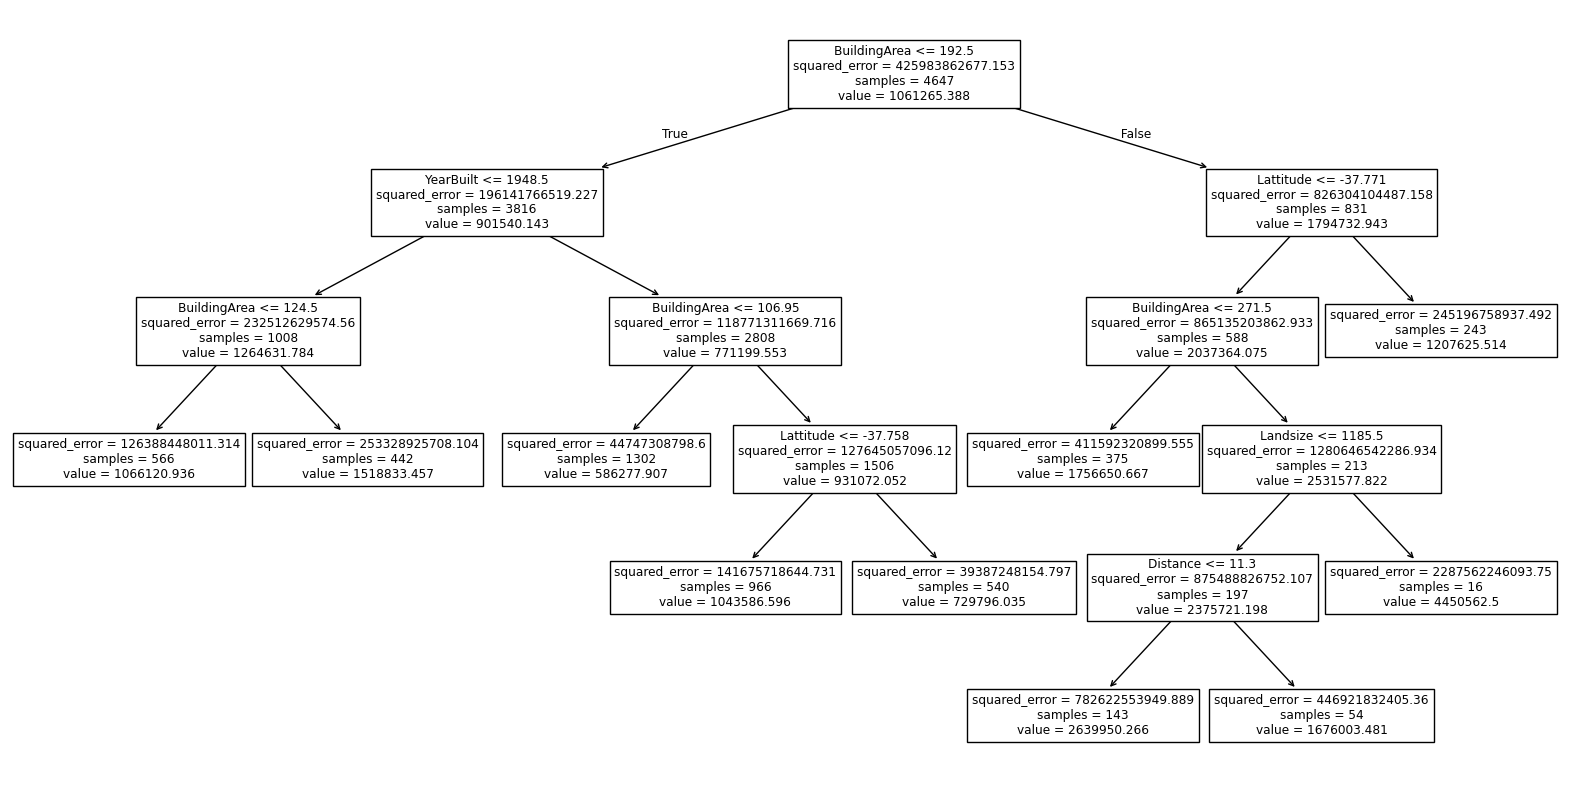

In [142]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 10)}) # set font and plot size to be larger

model = DecisionTreeRegressor(max_leaf_nodes=10, random_state=1)
model.fit(train_X, train_y)
plot_tree(model, feature_names = X.columns);

## Training a Random Forest

Decision trees leave us with a difficult trade-off. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

Thanks to our Scikit-learn modeling pipeline we can reuse most of our code to train a random forest model with 100 trees.

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [144]:
# Define
forest_model = RandomForestRegressor(random_state=1, n_estimators=350, max_features="log2")
# Fit
forest_model.fit(train_X, train_y)

# Evaluate
melb_preds = forest_model.predict(val_X)
print("The MAE of our model is: {}".format(mean_absolute_error(val_y, melb_preds)))

The MAE of our model is: 179524.55459884147


There is likely room for further improvement, but this is a big improvement over the best decision tree error of 243,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

In [145]:
def get_mae_forest(num_estimators, train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1, n_estimators = num_estimators, max_features="log2")
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    mae = mean_absolute_error(val_y, melb_preds)
    return(mae)

In [146]:
for n_estimators in range(10,511,50):
    oos_mae = get_mae_forest(n_estimators, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d   \t Out-of-sample:  %d" %(n_estimators, oos_mae))

Max leaf nodes: 10   	 Out-of-sample:  192048
Max leaf nodes: 60   	 Out-of-sample:  180195
Max leaf nodes: 110   	 Out-of-sample:  180030
Max leaf nodes: 160   	 Out-of-sample:  179908
Max leaf nodes: 210   	 Out-of-sample:  179657
Max leaf nodes: 260   	 Out-of-sample:  179690
Max leaf nodes: 310   	 Out-of-sample:  179643
Max leaf nodes: 360   	 Out-of-sample:  179641
Max leaf nodes: 410   	 Out-of-sample:  179857
Max leaf nodes: 460   	 Out-of-sample:  180073
Max leaf nodes: 510   	 Out-of-sample:  180154


## Exercise

Up to you now - you find the Salaries csv (still with ; instead of ,) in the codespace - use it to create a simple regression model for predicting the salary of academic staff. Try out different models but limit the tuning effort.

In [147]:
salaries = pd.read_csv("Salaries.csv", sep=";")

In [148]:
salaries

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [149]:
salaries.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [150]:
y = salaries.salary

In [169]:
def categorizeRank(rank):
    if rank == "AsstProf":
        return(0)
    else:
        return(1)

In [170]:
salaries['tenured'] = salaries['rank'].apply(categorizeRank)

In [151]:
salaries.sex

0       Male
1       Male
2       Male
3       Male
4       Male
       ...  
73    Female
74    Female
75    Female
76    Female
77    Female
Name: sex, Length: 78, dtype: object

In [152]:
def categorizeGender(sex):
    if sex == "Male":
        return(0)
    else:
        return(1)

In [153]:
salaries['female'] = salaries['sex'].apply(categorizeGender)

In [154]:
salaries.discipline

0     B
1     A
2     A
3     A
4     B
     ..
73    B
74    B
75    B
76    A
77    A
Name: discipline, Length: 78, dtype: object

In [155]:
def categorizeField(discipline):
    if discipline == "A":
        return(0)
    else:
        return(1)

In [156]:
salaries['disciplineA'] = salaries['discipline'].apply(categorizeField)

In [178]:
salary_features = ['service','phd','disciplineA','female']
X = salaries[salary_features]

In [179]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Random Forest

In [180]:
# Define
forest_model = RandomForestRegressor(random_state=1, n_estimators=10)
# Fit
forest_model.fit(train_X, train_y)

# Evaluate
salary_preds = forest_model.predict(val_X)
print("The MAE of our model is: {}".format(mean_absolute_error(val_y, salary_preds)))

The MAE of our model is: 20972.46


### Decision Tree

In [182]:
# Build the model
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = dt_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 28175.9


### Linear Regression

In [184]:
from sklearn.linear_model import Lasso

# Build the model
lasso_model = Lasso(random_state=1)
lasso_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = lasso_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 12944.50679662563


In [186]:
from sklearn.ensemble import GradientBoostingRegressor

# Define
gbm_model = GradientBoostingRegressor(random_state=1)
# Fit
gbm_model.fit(train_X, train_y)

# Evaluate
salary_preds = gbm_model.predict(val_X)
print("The MAE of our model is: {}".format(mean_absolute_error(val_y, salary_preds)))

The MAE of our model is: 23423.506707427983
